# Lesson 5 Assignment - Targeted Marketing Campaign

## Author - Trupti Gandhi

In this problem we will use historical data from past customer responses to build a classification model.

We will apply the trained model to a new set of prospects to whom we may want extend an offer for a [Personal Equity Plan](https://www.investopedia.com/terms/p/pep.asp). Rather than doing a mass marketing campaign to all new prospects, we would like to target those that are likely to respond positively to our offer (according to our classification model).

## Tasks
Use the provided Bank Data.csv file: 

1. Read in, parse and preprocess the data
2. Perform a brief exploratory analysis
3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
4. Graph the structure of your decision tree
5. Graph the confusion matrix of your random forest model


 #### Preprocess the data

In [343]:
# Data set contains 600 rows and 11 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Bank%20Data.csv"


In [344]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
% matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen




In [345]:
# Import libraries
Bank_Data = pd.read_csv(r"C:\Users\Gandhi\Desktop\Machine_learning_techniques\CH5-Ensemble_Method\Bank_Data.csv")
Bank_Data.head()

#Bank_Data= pd.read_csv(r"C:\Users\V-TRUGAN\Desktop\WORK\Work\Data\Anaconda\Data_Science_machine learning_technique\CH5- Ensemble_Models\Bank_Data.csv")
#Bank_Data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [346]:
Bank_Data.columns.tolist()

['age',
 'sex',
 'region',
 'income',
 'married',
 'children',
 'car',
 'save_act',
 'current_act',
 'mortgage',
 'pep']

In [347]:
columns = list(Bank_Data)

In [348]:
print('The shape of our features is:', Bank_Data.shape)

The shape of our features is: (600, 11)


The following is a description of the dataset:

- of Classes: 2 (‘pep Worthy’ and ‘Non-pep Worthy’)
- of attributes (Columns): 13
- of instances (Rows): 600

#### Perform a brief exploratory analysis

#### Descriptive Statistics for Continuous Variables

In [349]:
Bank_Data.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


We make the following observations from the descriptive statistics above:

- There are total 600 observations
- All continuous variables seem clean and well populated

#### Descriptive Statistics for Categorical Variables

In [350]:
Bank_Data.describe(include=["object"])

,sex,region,married,car,save_act,current_act,mortgage,pep
count,600,600,600,600,600,600,600,600
unique,2,4,2,2,2,2,2,2
top,MALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,300,269,396,304,414,455,391,326


We have 8 categorical variables

In [351]:
continuous_vars = Bank_Data.describe().columns
continuous_vars

Index(['age', 'income', 'children'], dtype='object')

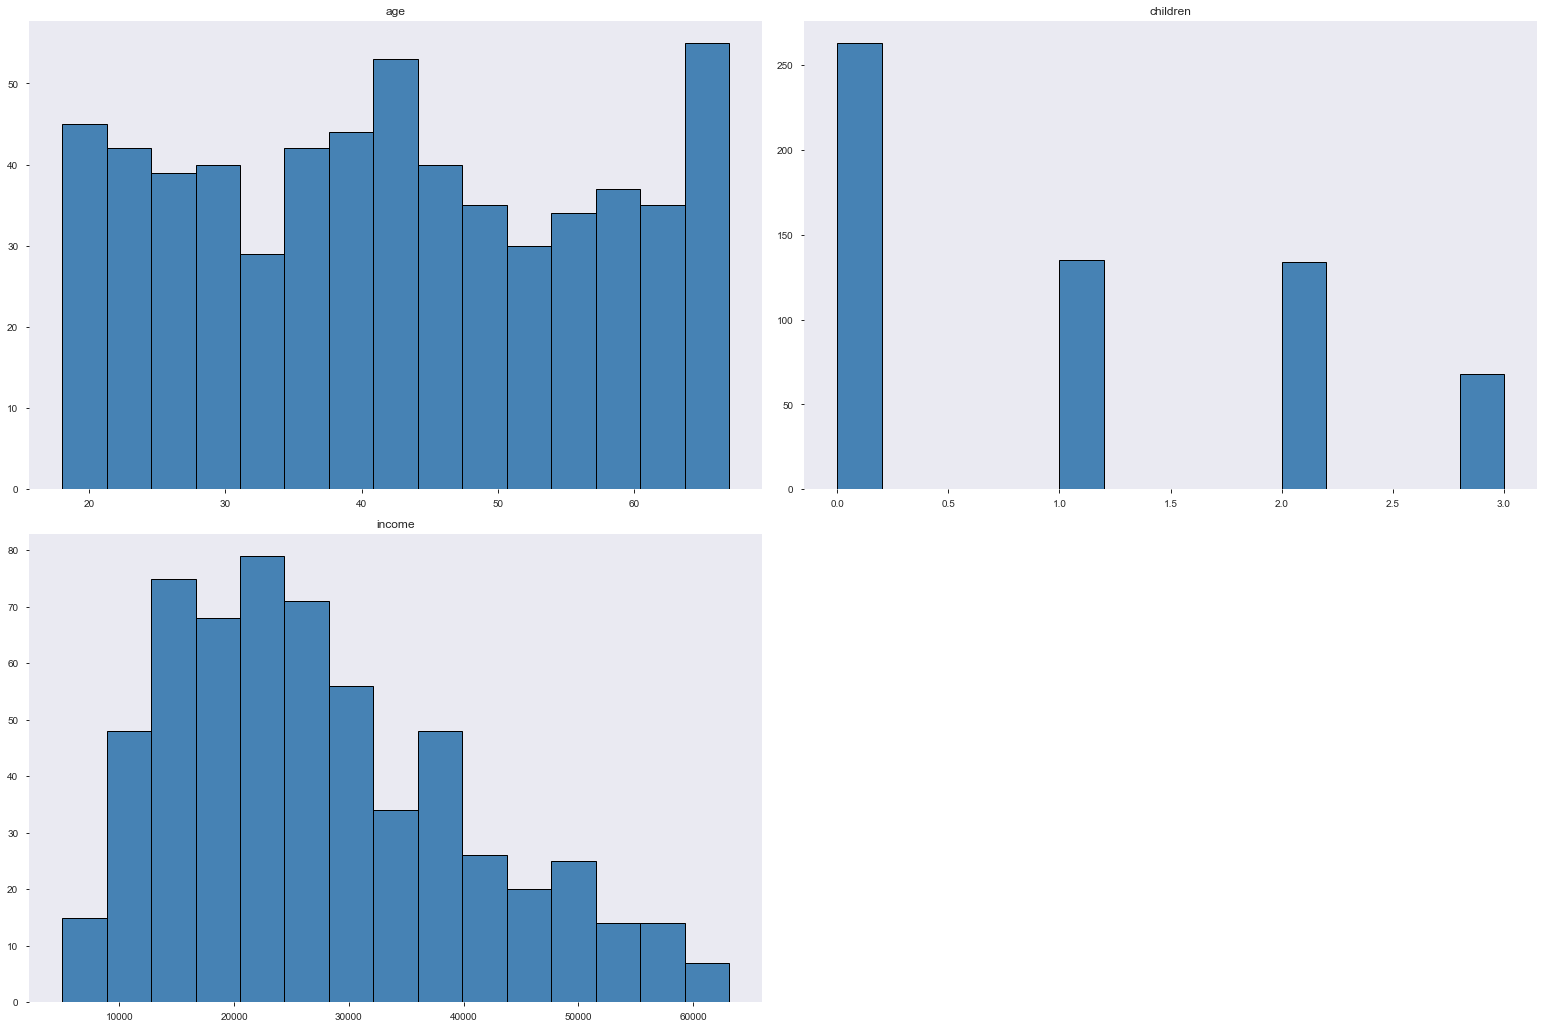

In [352]:
plt.rcParams['figure.figsize'] = (18,12)
Bank_Data.hist(bins = 15, color = 'steelblue', edgecolor ='black', linewidth = 1.0, xlabelsize = 10, grid = False)
plt.tight_layout(rect =(0,0,1.2,1.2))
plt.show()

In [353]:
categorical_vars = Bank_Data.describe(include=["object"]).columns
categorical_vars

Index(['sex', 'region', 'married', 'car', 'save_act', 'current_act',
       'mortgage', 'pep'],
      dtype='object')

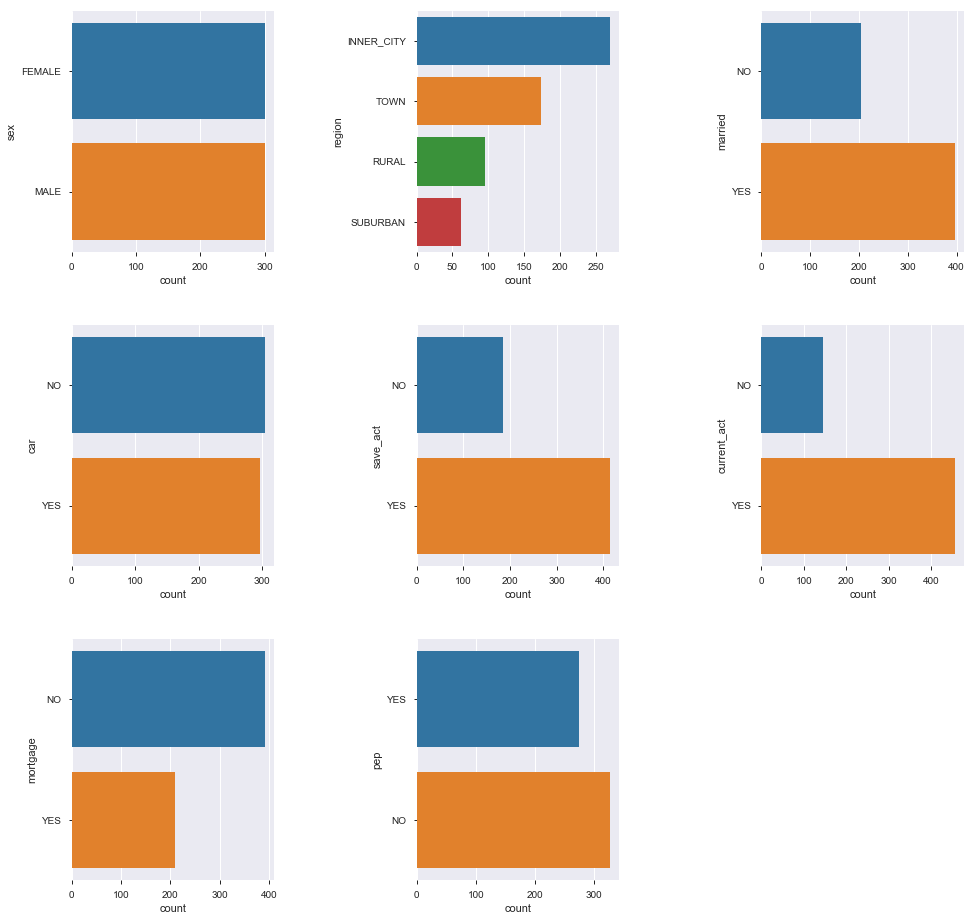

In [354]:
#Visualizing Distribution of Categorical Variables
# Count plots of categorical variables

fig, axes = plt.subplots(3, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=Bank_Data, ax=ax)
plt.show()

In [355]:
Bank_Data['pep'].value_counts()

NO     326
YES    274
Name: pep, dtype: int64

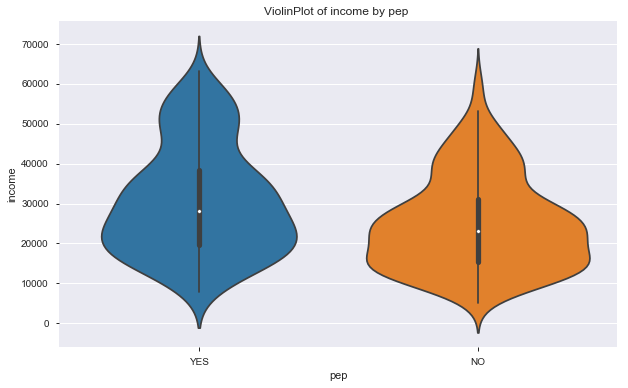

In [356]:
fig= plt.figure(figsize=(10,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='pep',y ='income', data=Bank_Data , ax=ax)
ax.set_title('ViolinPlot of income by pep ') # Give the plot a main title
ax.set_xlabel('pep') # Set text for the x axis
ax.set_ylabel('income')# Set text for y axis
plt.show()


In [357]:
Bank_Data.groupby(['region']).size()


region
INNER_CITY    269
RURAL          96
SUBURBAN       62
TOWN          173
dtype: int64

In [358]:
desc = (Bank_Data.loc[Bank_Data.region == 'TOWN', 'income'])
TOWN = round (desc.describe(), 4)

desc2 = (Bank_Data.loc[Bank_Data.region=='SUBURBAN', 'income'])
SUBURBAN  = round (desc2. describe(), 4 )

desc3 = (Bank_Data.loc[Bank_Data.region == 'RURAL', 'income'])
RURAL = round (desc.describe(), 4)

desc4 = (Bank_Data.loc[Bank_Data.region=='INNER_CITY', 'income'])
INNER_CITY = round (desc2. describe(), 4 )

pd.concat([TOWN, SUBURBAN, RURAL,INNER_CITY], axis = 1, keys =["TOWN", "SUBURBAN", "RURAL","INNER_CITY"])

,TOWN,SUBURBAN,RURAL,INNER_CITY
count,173.0000,62.0000,173.0000,62.0000
mean,26786.3497,28656.3569,26786.3497,28656.3569
std,11756.6387,13888.9500,11756.6387,13888.9500
min,5014.2100,8143.7500,5014.2100,8143.7500
25%,18504.3000,17672.9750,18504.3000,17672.9750
50%,24867.6000,25430.0000,24867.6000,25430.0000
75%,33204.3000,37291.1750,33204.3000,37291.1750
max,59803.9000,63130.1000,59803.9000,63130.1000


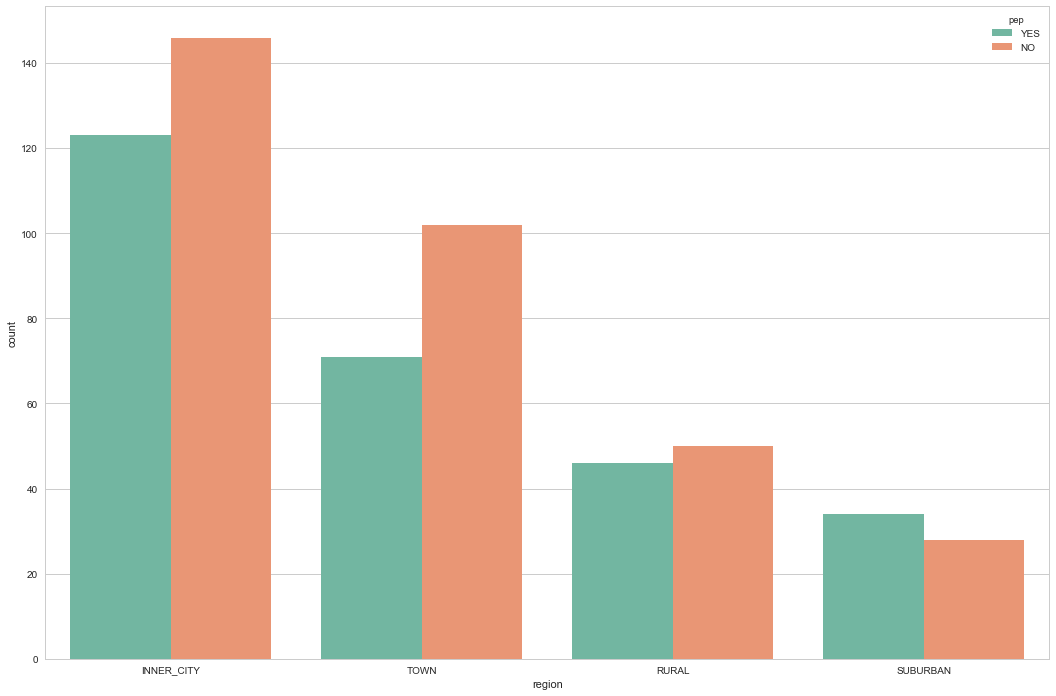

In [359]:
sns.countplot(x= 'region', hue = 'pep', data = Bank_Data, palette = "Set2")
plt.show()

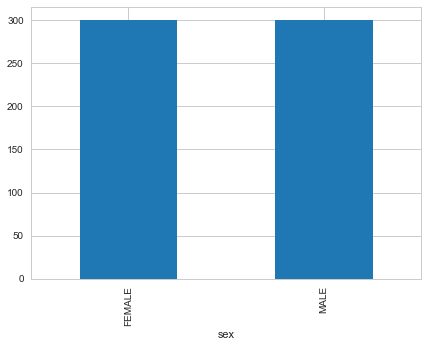

In [360]:
Bank_Data.groupby(['sex']).size().plot(kind ='bar', figsize = (7,5))
plt.show()

Male and Female are exact same number, 300. Let's see if there is any differance oin the income? 

In [361]:
desc = (Bank_Data.loc[Bank_Data.sex == 'FEMALE', 'income'])
female = round (desc.describe(), 4)

desc2 = (Bank_Data.loc[Bank_Data.sex=='MALE', 'income'])
male = round (desc2. describe(), 4 )

pd.concat([female, male], axis = 1, keys =["Female", "Male"])

,Female,Male
count,300.0000,300.0000
mean,27831.3682,27216.6942
std,13031.2582,12780.6821
min,7549.3800,5014.2100
25%,17711.1000,16805.1750
50%,25448.9000,24449.2000
75%,34873.1000,36610.8500
max,63130.1000,59409.1000


Clearly Females are better than male in **income**. Mean for both of them are almost similar. 

Below graph shows linear relation between age and income.

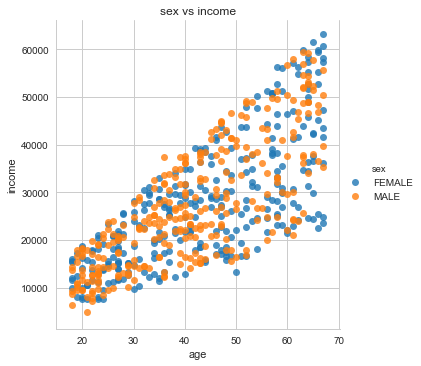

In [362]:
# creates the plot using
sex_income = sns.lmplot(x = 'age', y = 'income', data = Bank_Data, hue = 'sex', fit_reg=False)

# set title
sex_income.set(title = 'sex vs income')
plt.show()

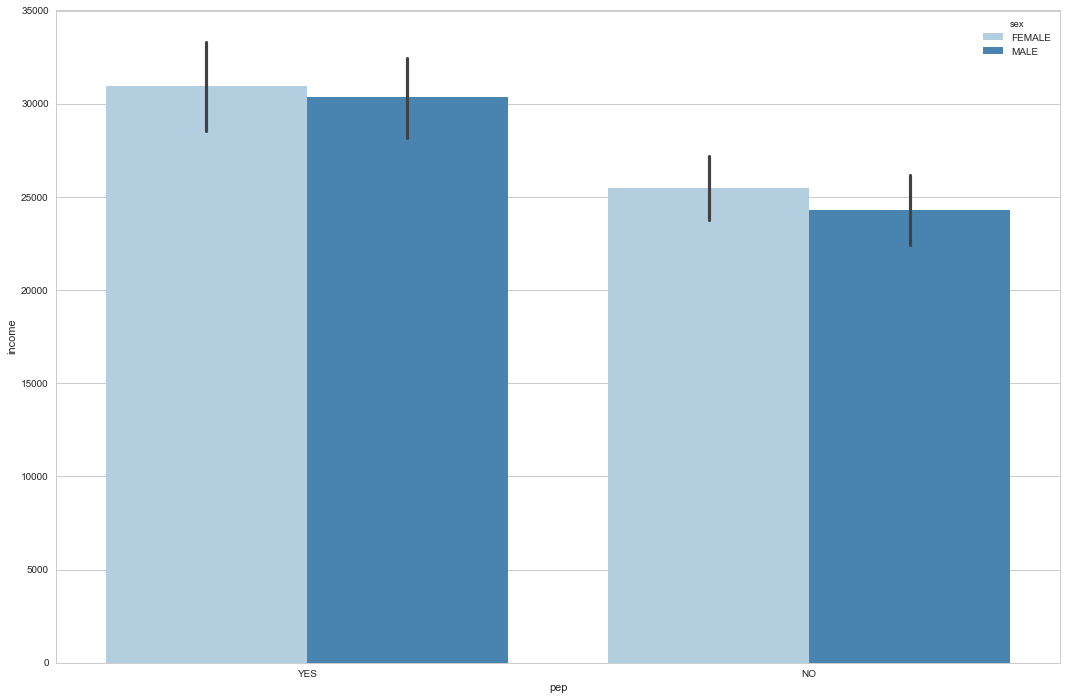

In [363]:
sns.barplot(x = 'pep', y = 'income', hue ='sex', data = Bank_Data, palette = "Blues")
plt.show()

people prefer to have pep when they have more than $3000 income.

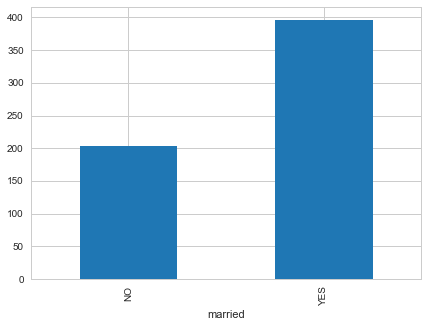

In [364]:
Bank_Data.groupby(['married']).size().plot(kind='bar', figsize=(7, 5))
plt.show()

In [365]:


desc = (Bank_Data.loc[Bank_Data.married == 'YES', 'income'])
Married = round (desc.describe(), 4)

desc2 = (Bank_Data.loc[Bank_Data.married=='NO', 'income'])
No_married = round (desc2. describe(), 4 )

pd.concat([Married, No_married], axis = 1, keys =["Married", "No_married"])

,Married,No_married
count,396.0000,204.0000
mean,27446.4515,27674.6271
std,12655.2296,13391.2703
min,7723.9300,5014.2100
25%,17555.2500,16816.0000
50%,24718.2500,25890.6500
75%,36113.4750,36300.8750
max,63130.1000,60747.5000


More people are married, but no big differenace in numbers. 

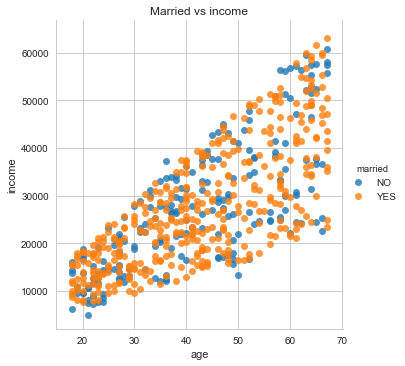

In [366]:
# creates the plot using
sex_income = sns.lmplot(x = 'age', y = 'income', data = Bank_Data, hue = 'married', fit_reg=False)

# set title
sex_income.set(title = 'Married vs income')
plt.show()

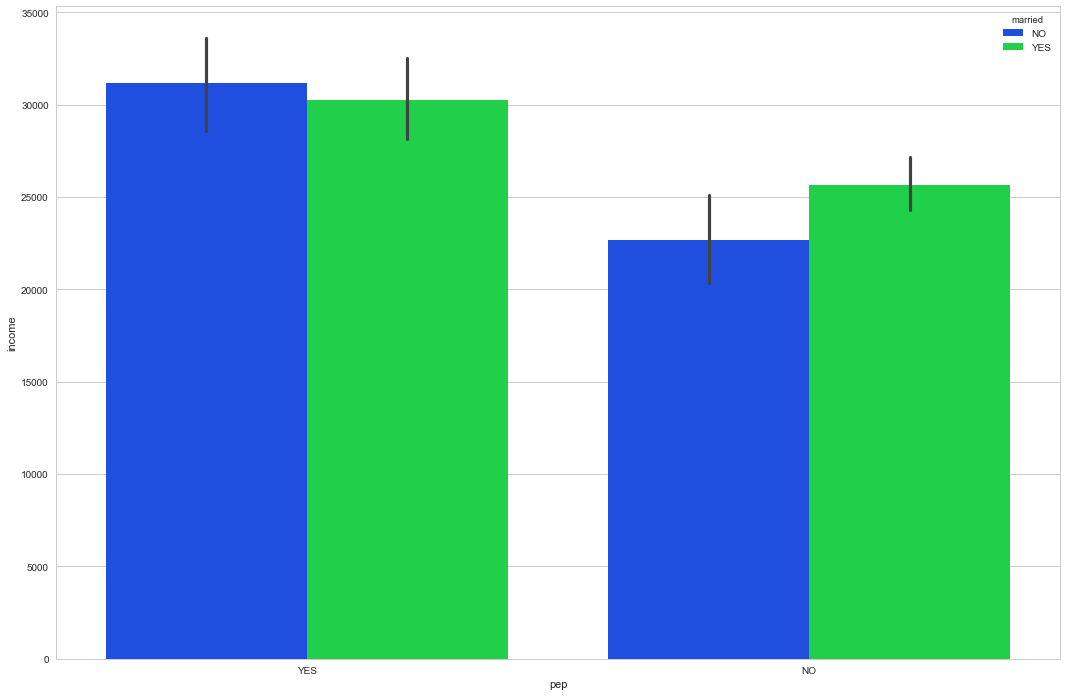

In [367]:

sns.barplot(x = 'pep', y = 'income', hue ='married', data = Bank_Data, palette = "bright")
plt.show()

Looks like Married people does not have any effect on the pep, income matters.

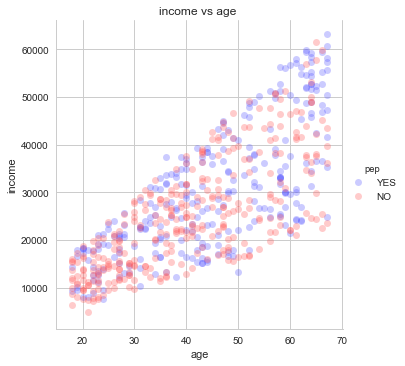

In [368]:
# better visibility
sns.lmplot(y='income', x='age',
           data =Bank_Data,
           hue = "pep",
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('age')
plt.ylabel('income')
plt.title('income vs age ')
plt.show()

More income seems to have positive effect on pep.

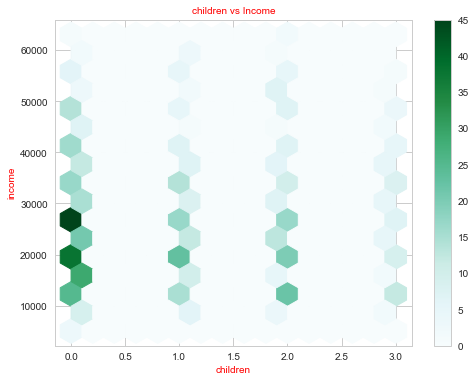

In [369]:
ax =plt.figure(figsize =(8,6)).gca()
Bank_Data.plot.hexbin(x='children',y='income',gridsize =15,ax=ax)
ax.set_title('children vs Income', fontsize =10, color = 'r') # Give the plot a main title
ax.set_xlabel('children',fontsize =10, color = 'r')# Set text for y axis
ax.set_ylabel('income', fontsize =10, color = 'r')
plt.show()

Zero children has more density/ more darker. We can say, most of the customers have no children. 

Below calculation shows that 263 customers do not have kids and 269 customers have either 1 or 2. 

In [370]:
Bank_Data.groupby(['children']).size()

children
0    263
1    135
2    134
3     68
dtype: int64

In [371]:
Bank_Data['income'].describe()

count      600.000000
mean     27524.031217
std      12899.468246
min       5014.210000
25%      17264.500000
50%      24925.300000
75%      36172.675000
max      63130.100000
Name: income, dtype: float64

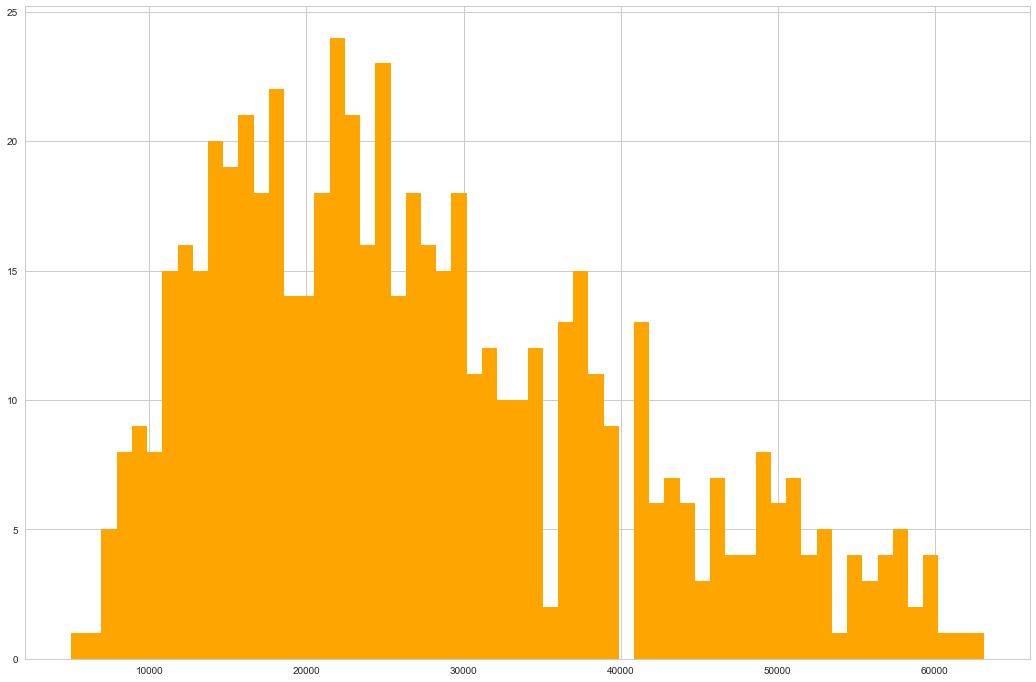

In [372]:
Bank_Data['income'].hist(bins =60,color = 'orange')
plt.show()

In [373]:
# calculate correlation matrix

corr = Bank_Data.corr()

In [374]:
corr.transpose()

,age,income,children
age,1.000000,0.752726,0.023572
income,0.752726,1.000000,0.036761
children,0.023572,0.036761,1.000000


In [375]:
import pandas_profiling

In [376]:
# prints the report to the screen
pandas_profiling.ProfileReport(Bank_Data)

Number of variables,11
Number of observations,600
Total Missing (%),0.0%
Total size in memory,51.6 KiB
Average record size in memory,88.1 B
Numeric,3
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [377]:
# prints the report to an HTML file
pfr = pandas_profiling.ProfileReport(Bank_Data)
pfr.to_file("Bank_Data.html")

#### Preparation


- Creating dummy variables for categorical variables
- Scaling numerical variables
- Removing variables based on variance



#### One-Hot Encoding


The first step for us is known as one-hot encoding of the data. This process takes categorical variables, such as sex, region of the week and converts it to a numerical representation without an arbitrary ordering.

In [378]:
New_Data = pd.get_dummies(Bank_Data, columns=['sex', 'region', 'married','car', 'save_act', 'current_act', 'mortgage', 'pep'],drop_first=True)

New_Data.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
age,48.0,40.0,51.0,23.0,57.0,57.0,22.00,58.0,37.0,54.0,66.0,52.0,44.0,66.0,36.0,38.0,37.0,46.0,62.0,31.0,61.0,50.0,54.0,27.0,22.0,56.0,45.0,39.0,39.0,61.0,61.0,20.0,45.0,33.0,43.0,27.0,19.0,36.0,43.0,66.0,55.0,47.0,67.0,32.0,20.0,64.0,50.0,29.0,52.0,47.0,24.0,36.0,43.0,48.0,63.0,52.0,58.0,28.0,29.0,34.0,42.0,65.0,47.0,20.0,21.00,42.0,19.0,41.0,30.0,31.0,25.0,21.00,36.0,58.0,64.0,59.0,45.0,61.0,30.0,58.0,50.0,30.0,29.0,35.0,62.0,36.0,25.0,66.0,30.0,54.0,37.0,28.0,53.0,61.0,61.0,18.00,22.00,34.0,35.0,18.0,54.0,27.0,42.0,43.0,64.0,43.0,49.0,23.0,23.0,30.0,36.0,34.0,51.0,36.0,56.0,54.0,56.0,26.0,39.0,64.0,46.0,62.0,36.0,35.0,47.0,47.0,37.0,48.0,41.0,27.0,43.0,61.0,52.0,64.0,66.0,53.0,20.0,57.0,65.0,64.0,52.0,47.0,28.0,64.0,25.0,58.0,34.0,20.0,63.0,30.0,53.0,43.0,63.0,33.0,41.0,20.00,50.0,24.0,60.0,44.0,23.0,40.0,49.0,21.00,40.0,26.0,20.00,24.00,37.0,56.0,52.0,22.0,35.0,34.0,67.0,58.0,40.0,41.0,43.0,63.0,22.0,60.0,65.0,48.0,38.0,49.0,20.0,48.0,38.0,41.0,67.0,39.0,64.0,41.0,55.0,52.0,30.0,52.0,26.0,26.0,46.0,46.0,52.0,37.0,22.0,18.0,63.0,25.0,67.0,27.0,61.0,58.0,22.0,28.0,23.00,27.0,27.0,40.0,39.0,35.0,37.0,47.0,42.0,67.0,57.0,47.0,67.0,56.0,37.0,27.0,59.0,31.0,31.0,32.0,57.0,49.0,65.0,22.0,26.0,23.0,26.0,59.0,67.0,34.0,50.0,46.0,23.00,26.0,40.0,36.0,...,33.0,38.0,56.0,48.0,49.0,54.0,41.0,19.00,52.0,52.0,64.0,56.0,56.0,19.0,56.0,27.0,59.0,56.0,21.0,64.0,62.0,44.0,24.00,52.0,67.0,41.0,58.0,40.0,19.0,20.00,56.0,46.0,30.0,40.0,36.0,57.0,49.0,61.0,29.0,48.0,56.0,40.0,58.0,60.0,58.0,67.0,40.0,48.0,64.0,43.0,34.0,26.0,48.0,35.0,24.0,47.0,52.0,31.0,41.0,23.0,27.0,22.0,67.0,26.0,58.0,27.0,36.0,31.0,28.0,57.0,64.0,49.0,22.0,58.0,20.0,44.0,65.0,53.0,34.0,35.0,48.0,64.0,46.0,42.0,47.0,23.0,35.0,64.0,18.0,19.0,40.0,47.0,43.0,38.0,21.0,40.0,52.0,35.0,53.0,38.0,42.0,43.0,59.0,59.0,24.0,27.0,32.0,65.0,18.0,66.0,41.0,64.0,23.0,29.0,28.0,57.0,38.0,34.0,43.0,63.0,62.0,51.0,61.0,41.0,31.0,33.0,43.0,40.0,47.0,46.0,30.0,47.0,44.0,23.0,28.0,64.0,35.0,19.0,27.0,27.0,58.0,46.0,61.0,59.0,47.0,44.0,50.0,64.0,51.0,46.0,39.0,58.0,32.0,22.0,63.0,35.0,59.0,22.0,60.0,23.0,29.0,44.0,63.0,25.0,37.0,48.0,35.

In [379]:
New_Data.shape

(600, 13)

Features and Targets and Convert Data to Arrays

In [380]:
#X = New_Data.iloc[:, 0:11]   # load features into X DF
#Y = New_Data.iloc[:, 12]     # Load target into Y DF

In [412]:
 # load features into X DF
X = New_Data.loc[:,['age',
 'income',
 'children',
 'sex_MALE',
 'region_RURAL',
 'region_SUBURBAN',
 'region_TOWN',
 'married_YES',
 'car_YES',
 'save_act_YES',
 'current_act_YES',
  'mortgage_YES']]
 # Load target into Y DF
Y = New_Data.loc[:,'pep_YES'] 

#### Training and Testing Sets

There is one final step of data preparation: splitting data into training and testing sets. During training, we let the model ‘see’ the answers, in this case the actual pep value, so it can learn how to predict the pep values from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is. 

In [413]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=1)

We can look at the shape of all the data to make sure we did everything correctly. We expect the training features number of columns to match the testing feature number of columns and the number of rows to match for the respective training and testing features and the labels :

In [414]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (540, 12)
Training Labels Shape: (540,)
Testing Features Shape: (60, 12)
Testing Labels Shape: (60,)


It looks as if everything is in order! Just to recap, to get the data into a form acceptable for machine learning we:

- One-hot encoded categorical variables
- Split data into features and labels
- Converted to arrays
- Split data into training and testing sets

Feature scaling is a method used to standardize the range of features, usually between the range from 0 to 1. It is also known as data normalization (or standardization) and is a crucial step in data preprocessing.

In [415]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [416]:
X_train_norm = mms.fit_transform(X_train)
y_train_norm = mms.fit_transform(y_train.values.reshape(-1, 1))

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [417]:
X_train_norm

array([[ 0.531,  0.575,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.816,  0.482,  0.333, ...,  0.   ,  1.   ,  0.   ],
       [ 0.388,  0.341,  0.333, ...,  0.   ,  1.   ,  1.   ],
       ..., 
       [ 0.367,  0.464,  1.   , ...,  1.   ,  1.   ,  1.   ],
       [ 0.633,  0.201,  0.333, ...,  1.   ,  1.   ,  1.   ],
       [ 0.367,  0.144,  0.   , ...,  0.   ,  1.   ,  0.   ]])

In [418]:
y_train_norm[0:5]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.]])

### Feature Selection

Now that we've normalized our data to a standard scale, let's take a look at which features make the most sense for our dataset.


Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Three benefits of performing feature selection before modeling your data are:


- **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
- **Improves Accuracy**: Less misleading data means modeling accuracy improves.
- **Reduces Training Time**: Less data means that algorithms train faster.

In [419]:
# Print name of the columns
New_Data.columns.tolist()

['age',
 'income',
 'children',
 'sex_MALE',
 'region_RURAL',
 'region_SUBURBAN',
 'region_TOWN',
 'married_YES',
 'car_YES',
 'save_act_YES',
 'current_act_YES',
 'mortgage_YES',
 'pep_YES']

In [420]:
names = ['age',
 'income',
 'children',
 'sex_MALE',
 'region_RURAL',
 'region_SUBURBAN',
 'region_TOWN',
 'married_YES',
 'car_YES',
 'save_act_YES',
 'current_act_YES',
  'mortgage_YES']

In [421]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train_norm, y_train_norm)

# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)




[ 3.767  4.214  0.848  0.633  0.026  2.055  0.795  7.963  0.032  0.816
  0.042  0.267]


from the feature selection method, we can see age, income, region_SUBURBAN' and  'married_YES' are very important.

In [422]:
features = fit.transform(X_train_norm)
# summarize selected features
print(features[0:5,:])

[[ 0.531  0.575  0.     1.   ]
 [ 0.816  0.482  0.     0.   ]
 [ 0.388  0.341  0.     1.   ]
 [ 0.286  0.437  0.     1.   ]
 [ 0.694  0.752  0.     1.   ]]


#### Types of Decision Trees
Types of decision tree is based on the type of target variable we have. It can be of two types:


1.Categorical Variable Decision Tree. Decision Tree which has categorical target variable then it called as categorical variable decision tree. Example: In above scenario of student problem, where the target variable was “Student will play cricket or not” i.e. YES or NO.

2.Continuous Variable Decision Tree. Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree.

Our dataset is **Categorical Variable**

Ensemble methods are learning algorithms that construct a set of classifiers and then classify new data points by taking a (weighted) vote of their predictions. 


We start with a shallow decision tree and gradually increase its depth to improve the model accuracy. However, at some point, we start overfitting the model and hurting the generalization. Finding a balance between overfitting and model complexity can be hard. Alternatively, we can adopt a simpler model and push the accuracy by not taking decision from just one model but many models. Even each model makes some mistakes, the chance that all make the same mistakes is small. Hence we ensemble simpler models to avoid overfitting and later combining all results to make a much accurate prediction


In [423]:
from sklearn.tree import DecisionTreeClassifier 


# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3).fit(X_train_norm, y_train_norm) 
y_ent_pred = model_ent.predict(X_test)

#criterion='gini', prune='depth', max_depth=3, min_criterion=0.05
# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=4, random_state=1).fit(X_train_norm, y_train_norm)
y_gini_pred = model_gini.predict(X_test)

# NOTE: You should, when testing models, only vary 1 thing at a time

Trying GINI with few more features

In [433]:

# Use Gini impurity (default) instead of Information Gain (entropy)
dec_tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=4, random_state=1).fit(X_train_norm, y_train_norm)  
# Validate the model
y_predict_gini = dec_tree_gini.predict(X_test)

# Generate the accuracy score
acc_gini = accuracy_score(y_test, y_predict_gini) * 100
print("Accuracy is : {}%".format(acc_gini))

Accuracy is : 61.66666666666667%


In [434]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_predict_gini)*100))

Entropy accuracy is : 61.66666666666667%
Gini accuracy is : 61.66666666666667%


Accuracy is same for all the models.It is 61.66%

In [425]:
# confusion matrix for Gini decision tree
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test,y_predict_gini),
    columns=['Predicted pep', 'Predicted pep'],
    index=['True pep', 'True pep']
)

,Predicted pep,Predicted pep
True pep,18,20
True pep,3,19


In [435]:
# confusion matrix for entropy decision tree
pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns=['Predicted Don\'t Play', 'Predicted Play'],
    index=['True Don\'t play', 'True Play']
)

,Predicted Don't Play,Predicted Play
True Don't play,18,20
True Play,3,19


confusion matrix are also same for both gini and entropy.

In [441]:
from sklearn import tree


#create a visualization of the tree -- must install graphviz and pydot2 packages for this to work
dotfile1 = open("bank_ent.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile1, filled=True, rounded=True, feature_names = names[0:12])
dotfile1.close()

dotfile2 = open("bank_gini.dot", 'w')
tree.export_graphviz(model_gini, out_file = dotfile2, filled=True, rounded=True, feature_names = names[0:12])
dotfile2.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng bank_ent.dot -o bank_ent.png")
os.system("dot -Tpng bank_gini.dot -o bank_gini.png")

0

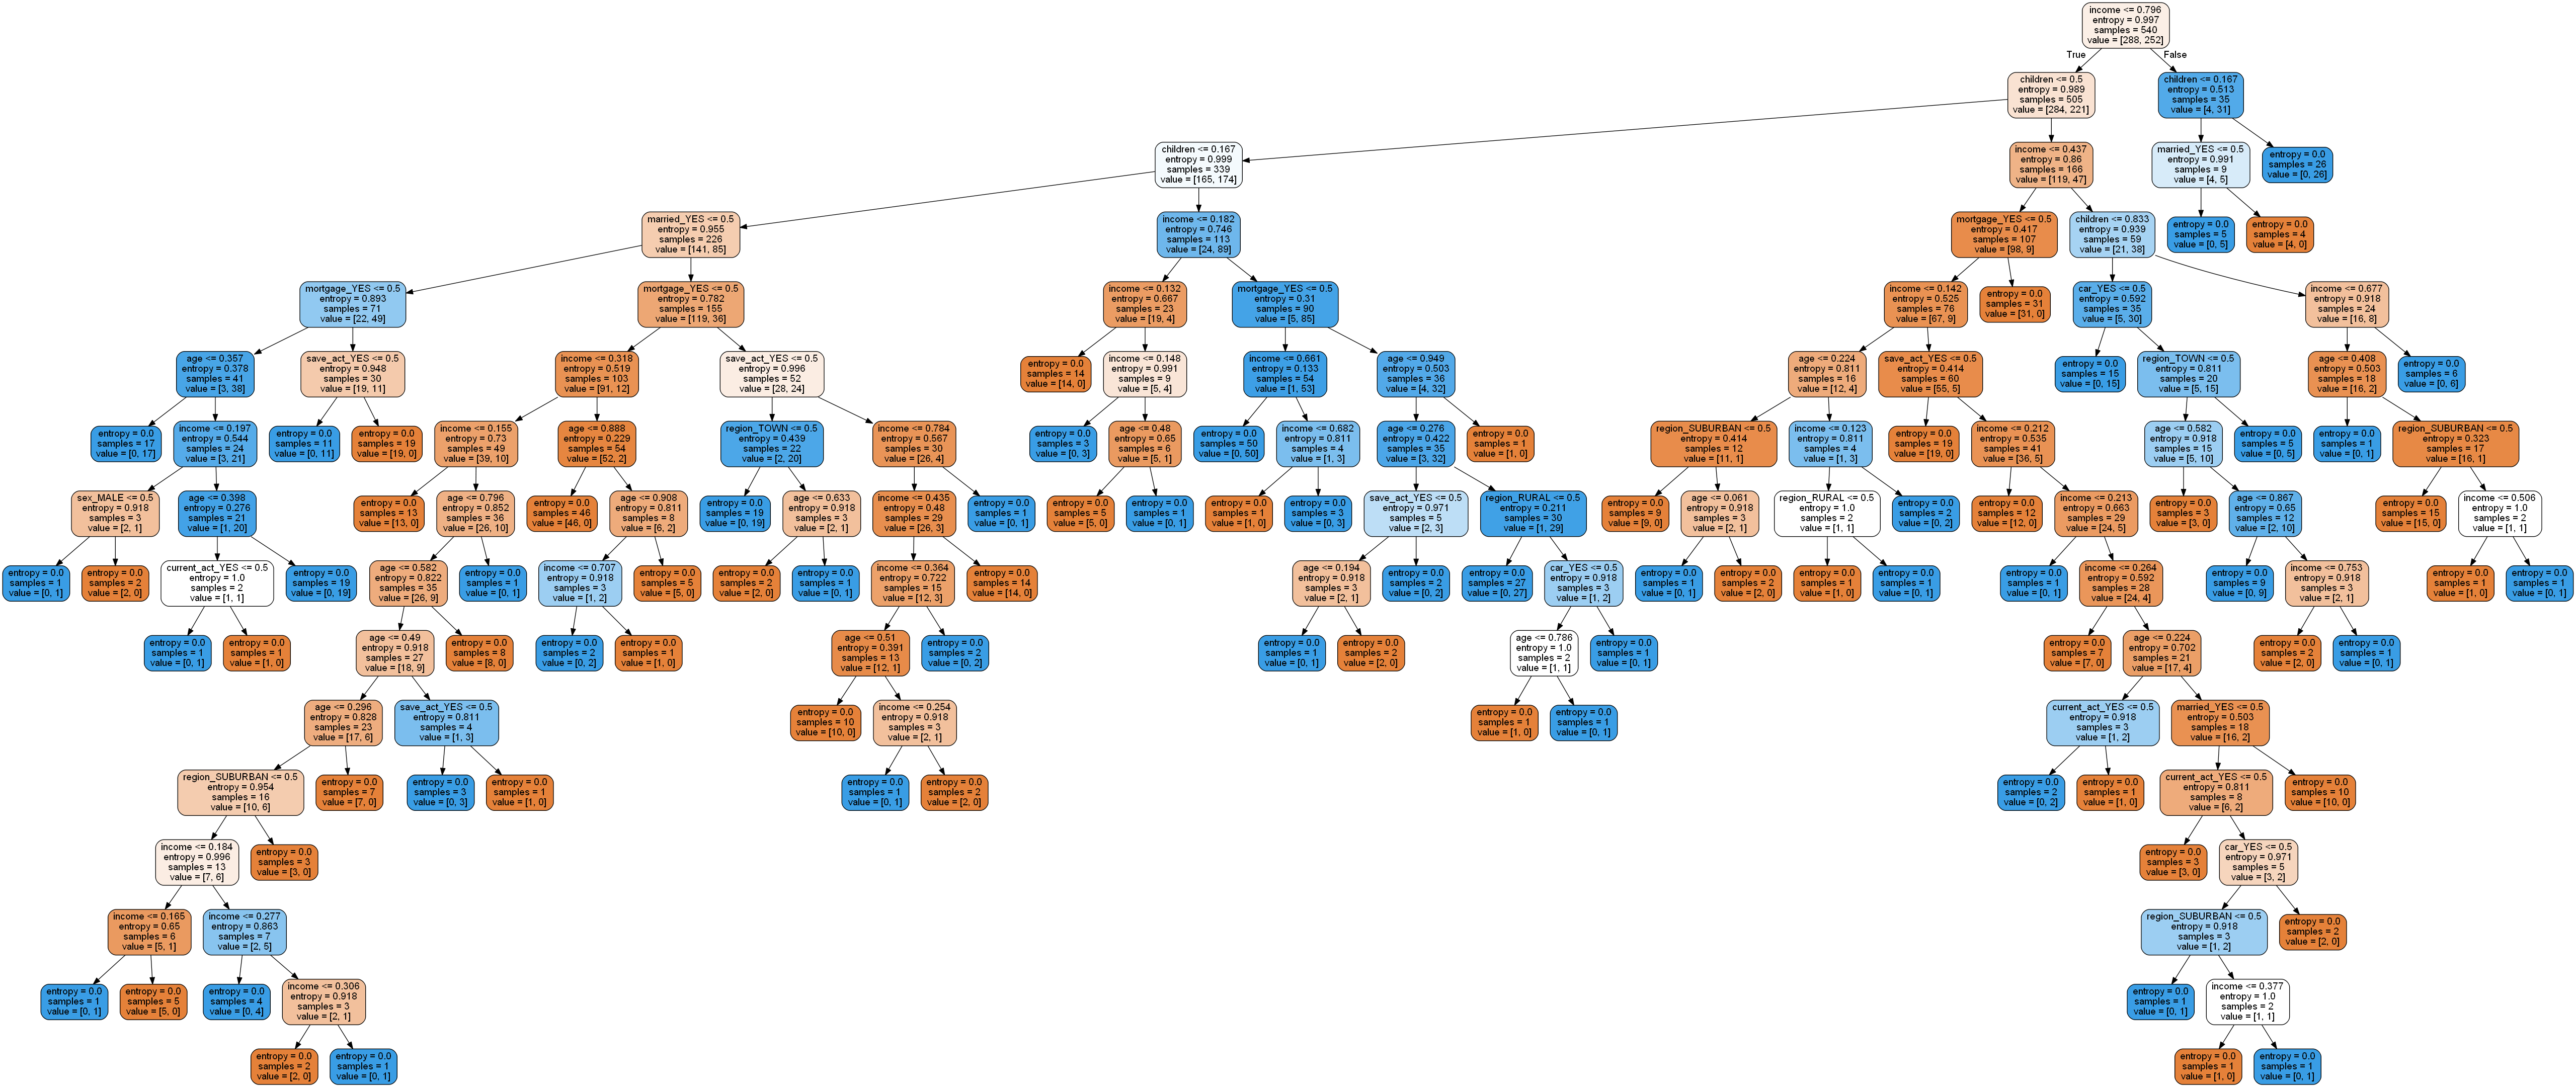

In [442]:
from IPython.display import Image
Image(filename='bank_ent.png', width=750, height=750)

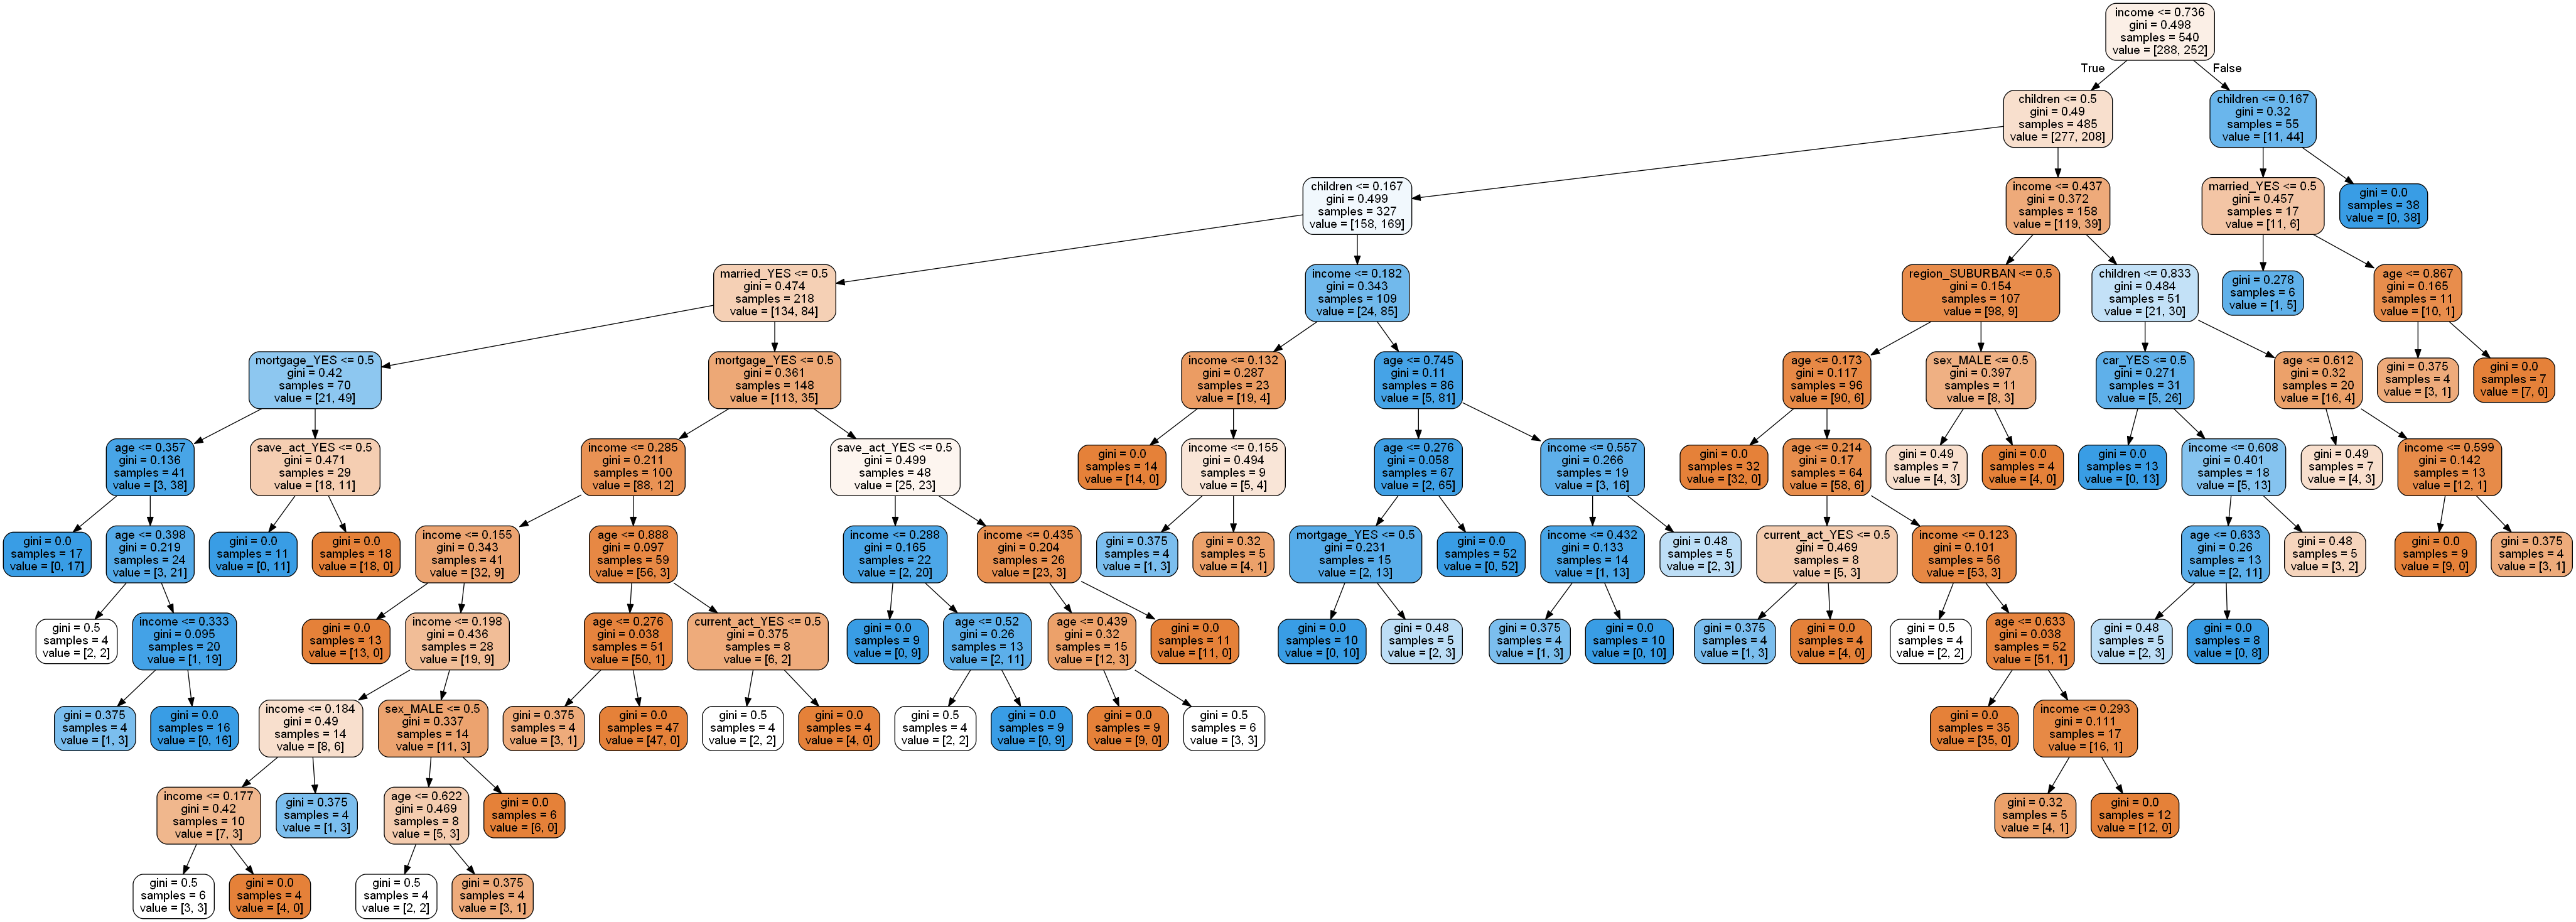

In [443]:
from IPython.display import Image
Image(filename='bank_gini.png', width=750, height=750)

Decision trees tend to have high variance when they utilize different training and test sets of the same data, since they tend to overfit on training data. This leads to poor performance on unseen data. Unfortunately, this limits the usage of decision trees in predictive modeling. 

However, using ensemble methods, we can create models that utilize underlying decision trees as a foundation for producing powerful results.

Now, let's create the RF model, starting with parameter tuning. Here are the parameters we will be tuning in this tutorial: 

- max_depth: The maximum splits for all trees in the forest.
- bootstrap: An indicator of whether or not we want to use bootstrap samples when building trees.
- max_features: The maximum number of features that will be used in node splitting — the main difference I previously mentioned between bagging trees and random forest. Typically, you want a value that is less than p, where p is all features in your data set.
- criterion: This is the metric used to asses the stopping criteria for the decision trees.

In [444]:
# Set the random state for reproductibility
fit_rf = RandomForestClassifier(random_state=42)

#### Hyperparameter Optimization 


Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data.  

In [445]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(X_train_norm, y_train_norm)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  6.55


C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Once we find the best parameter combination, we can set the parameters to our model.

In [399]:
# Set best parameters given by grid search
fit_rf.set_params(criterion = 'entropy',
                  max_features = None,
                  max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Another useful feature of random forest is the concept of an out-of-bag (OOB) error rate. Because only two-thirds of the data are used to train each tree when building the forest, one-third of unseen data can be used in a way that is advantageous to our accuracy metrics without being as computationally expensive as something like cross validation, for instance.

As outlined below, when calculating OOB, two parameters have to be changed. Also, by utilizing a for-loop across a multitude of forest sizes, we can calculate the OOB error rate and use it to asses how many trees are appropriate for our model!

In [446]:
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train_norm, y_train_norm)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [447]:
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


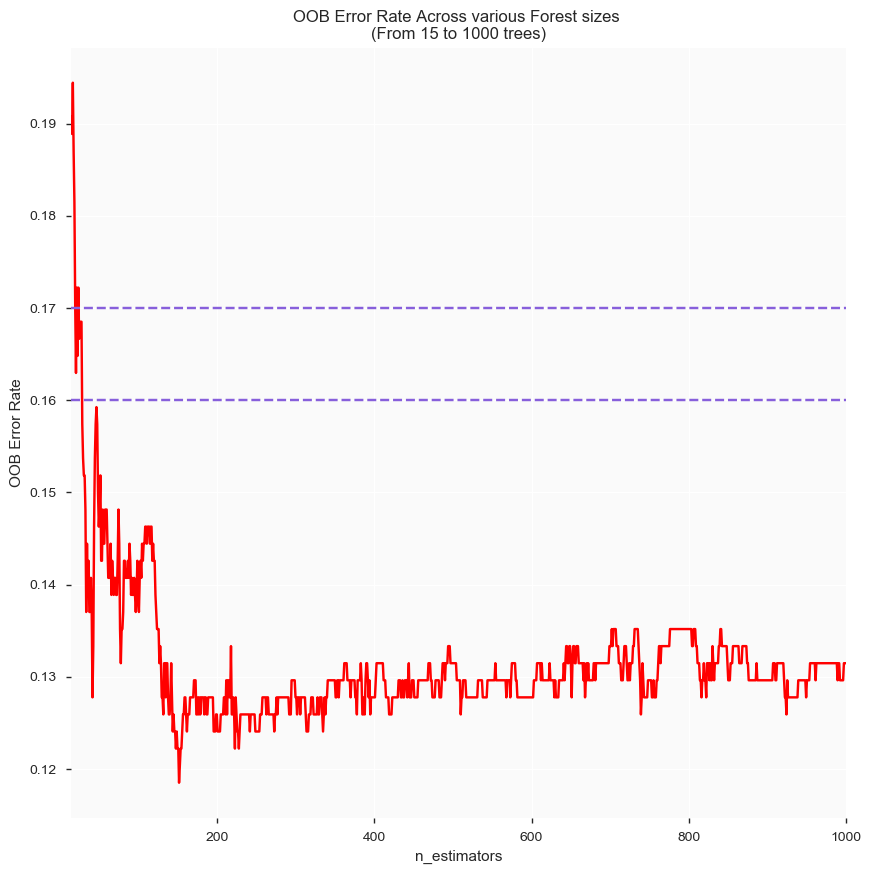

In [448]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_axis_bgcolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.16,
            color='#875FDB',
           linestyle='--')
plt.axhline(0.17,
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')
plt.show()

The OOB error rate starts to oscillate at around 200 trees, so I will go ahead and use 200 trees in my forest. Using the pandas series object, I can easily find the OOB error rate for the estimator as follows:

In [456]:
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[400]))

OOB Error rate for 200 trees is: 0.12778


Utilizing the OOB error rate that was created with the model gives us an unbiased error rate

In order for this methodology to work, we must set the number of trees calculated using the OOB error rate, and remove the warm_start and oob_score parameters, as well as include the bootstrap parameter.

In [457]:
fit_rf.set_params(n_estimators=200,
              bootstrap = True,
              warm_start=False,
              oob_score=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [465]:
# Next, let's train the algorithm with the training and target class data sets we made earlier
model_rf = fit_rf.fit(X_train_norm, y_train_norm)


C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [466]:
y_rf_pred = model_rf.predict(X_test)

In [467]:
from sklearn.metrics import accuracy_score

print("RF accuracy is : {}%".format(accuracy_score(y_test, y_rf_pred)*100))

RF accuracy is : 66.66666666666666%


** Accuracy for Random forest model is 67% **

In [459]:
importances_rf = fit_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

In [462]:
def variable_importance(importance, indices):
    """
    Purpose:
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on gini or information gain for CART model.

    Parameters:
    ----------
    names:      Name of columns included in model
    importance: Array returned from feature_importances_ for CART
                   models organized by dataframe index
    indices:    Organized index of dataframe from largest to smallest
                   based on feature_importances_

    Returns:
    ----------
    Print statement outputting variable importance in descending order
    """
    print("Feature ranking:")

    for f in range(len(names)):
        i = f
        print("%d. The feature '%s' \
has a Mean Decrease in entropy of %f" % (f + 1,
                                         names[indices[i]],
                                         importance[indices[f]]))

In [463]:
variable_importance(importances_rf, indices_rf)

Feature ranking:
1. The feature 'income' has a Mean Decrease in entropy of 0.268194
2. The feature 'children' has a Mean Decrease in entropy of 0.221866
3. The feature 'age' has a Mean Decrease in entropy of 0.186205
4. The feature 'married_YES' has a Mean Decrease in entropy of 0.069910
5. The feature 'mortgage_YES' has a Mean Decrease in entropy of 0.061726
6. The feature 'save_act_YES' has a Mean Decrease in entropy of 0.043284
7. The feature 'sex_MALE' has a Mean Decrease in entropy of 0.029746
8. The feature 'car_YES' has a Mean Decrease in entropy of 0.029045
9. The feature 'current_act_YES' has a Mean Decrease in entropy of 0.025712
10. The feature 'region_TOWN' has a Mean Decrease in entropy of 0.025628
11. The feature 'region_SUBURBAN' has a Mean Decrease in entropy of 0.019452
12. The feature 'region_RURAL' has a Mean Decrease in entropy of 0.019235


Feature importance can help identify useful features and eliminate features that don't contribute much to the model.


First four important features are

1. The feature 'income' has a Mean Decrease in entropy of 0.268194
2. The feature 'children' has a Mean Decrease in entropy of 0.221866
3. The feature 'age' has a Mean Decrease in entropy of 0.186205
4. The feature 'married_YES' has a Mean Decrease in entropy of 0.069910

In [464]:

# One more way to check:
features = ['age',
 'income',
 'children',
 'sex_MALE',
 'region_RURAL',
 'region_SUBURBAN',
 'region_TOWN',
 'married_YES',
 'car_YES',
 'save_act_YES',
 'current_act_YES',
  'mortgage_YES']


for feature, imp in zip(features, fit_rf.feature_importances_):
    print(feature, imp)

age 0.186204731693
income 0.268193925493
children 0.221865781703
sex_MALE 0.0297455679847
region_RURAL 0.0192347471146
region_SUBURBAN 0.0194517638797
region_TOWN 0.0256278156889
married_YES 0.0699095799861
car_YES 0.0290445799801
save_act_YES 0.0432835229447
current_act_YES 0.0257121885004
mortgage_YES 0.0617257950314


There are two major benefits of Ensemble models:

- Better prediction
- More stable model

Let's use these 4 features to predict model. 

In [468]:
X = New_Data.loc[:, ['age', 'income', 'children','married_YES']]   # load features into X DF
Y = New_Data.loc[:,'pep_YES' ]     # Load target into Y DF

In [482]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [483]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_new = mms.fit_transform(X_train)
y_train_new = mms.fit_transform(y_train.values.reshape(-1, 1))

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [486]:
# Create and fit the model
clf_rf = RandomForestClassifier(n_estimators=500,
              bootstrap = True,
              warm_start=False,
              oob_score=False)
clf_rf.fit(X_train_new, y_train_new)

C:\Users\Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [487]:
# Display Scores
from sklearn.metrics import recall_score
print('Validation Results')
print(clf_rf.score(X_test, y_test))
print(recall_score(y_test, clf_rf.predict(X_test)))



Validation Results
0.661111111111
0.85


We can clearly see the difference in the importance of variables for the ensemble method. Certain cutoff points can be made to reduce the inclusion of features and can help in the accuracy of the model, since we'll be removing what is considered noise within our feature space

Cross validation is a powerful tool that is used for estimating the predictive power of your model, and it performs better than the conventional training and test set. Using cross validation, we can create multiple training and test sets and average the scores to give us a less biased metric.

In [488]:
def cross_val_metrics(fit, training_set, class_set, print_results = True):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues
                  for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as
                  variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
            from cross validation score's standard deviation)
    """
    n = KFold(n_splits=10)
    scores = cross_val_score(fit,
                     training_set,
                     class_set,
                     cv = n)
    if print_results:
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
          .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [489]:
cross_val_metrics(clf_rf,
              X_train,
              y_train,
              print_results = True)

Accuracy:  0.829 (+/-  0.043)


In [492]:
predictions_rf = clf_rf.predict(X_test)

In [497]:
test_crosstb = pd.crosstab(index = y_test,
                           columns = predictions_rf)

# More human readable
test_crosstb = test_crosstb.rename(columns= {0: 'pep', 1: 'No pep'})
test_crosstb.index = ['pep', 'No pep']


In [498]:
test_crosstb

col_0,pep,No pep
pep,51,49
No pep,12,68


our model accuracy has increased to 82.9% with Ensembled model.

referances:
- https://machinelearningmastery.com/feature-selection-machine-learning-python/
- https://jetrobert.github.io/2017/04/18/decision-tree/ 
- https://bricaud.github.io/personal-blog/entropy-in-decision-trees/
- https://jhui.github.io/2017/01/15/Machine-learning-Decision-tree-random-forest-Ensemble-methods/ 
- https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html 